# Bandwidth Analysis

Basic visualization and summary statistics from bandwidth monitor data

In [152]:
import pandas as pd, matplotlib.pyplot as plt, mpld3
%matplotlib inline
#mpld3.enable_notebook()

## Bandwidth

### Import Data

In [153]:
bandwidth=pd.read_csv('speedtest.csv')
bandwidth.head(5)

,Server ID,Sponsor,Server Name,Timestamp,Distance,Ping,Download,Upload
0,10602,Aspire Technology Solutions,Gateshead,2018-04-01T18:42:03.020515,50.827748,48.377,5.888372e+06,5.121314e+06
1,16353,ITPS Ltd,Newcastle Upon Tyne,2018-04-01T19:42:03.281360,53.147594,52.077,4.786728e+06,4.315347e+06
2,4068,Bytemark Hosting,York,2018-04-01T20:42:03.728437,68.538991,44.386,5.042936e+06,5.660479e+06
3,4068,Bytemark Hosting,York,2018-04-01T21:42:03.634383,68.538991,33.350,5.063280e+06,4.984996e+06
4,10580,aql,Leeds,2018-04-01T22:42:03.429437,88.480717,37.735,6.241622e+06,6.002154e+06


### Parse data

Parse data to timestamps and mbps units:

In [154]:
bandwidth.Timestamp = pd.to_datetime(bandwidth.Timestamp)
bandwidth.Download = bandwidth.Download/(1024*1024)
bandwidth.Upload = bandwidth.Upload/(1024*1024)
bandwidth.head(5)

,Server ID,Sponsor,Server Name,Timestamp,Distance,Ping,Download,Upload
0,10602,Aspire Technology Solutions,Gateshead,2018-04-01 18:42:03.020515,50.827748,48.377,5.615589,4.884066
1,16353,ITPS Ltd,Newcastle Upon Tyne,2018-04-01 19:42:03.281360,53.147594,52.077,4.564979,4.115436
2,4068,Bytemark Hosting,York,2018-04-01 20:42:03.728437,68.538991,44.386,4.809318,5.398253
3,4068,Bytemark Hosting,York,2018-04-01 21:42:03.634383,68.538991,33.350,4.828720,4.754063
4,10580,aql,Leeds,2018-04-01 22:42:03.429437,88.480717,37.735,5.952475,5.724100


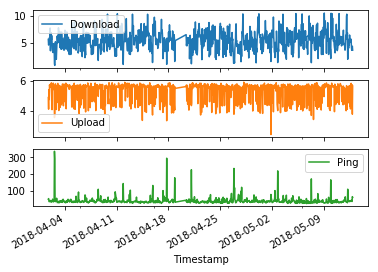

In [155]:
axes = bandwidth[['Timestamp','Download','Upload','Ping']].plot(x='Timestamp',subplots=True)

### Summary statistics and plots

In [156]:
bandwidth['Download_mean']=bandwidth.Download.mean()
bandwidth['Upload_mean']=bandwidth.Upload.mean()
bandwidth['ping_mean']=bandwidth.Ping.mean()

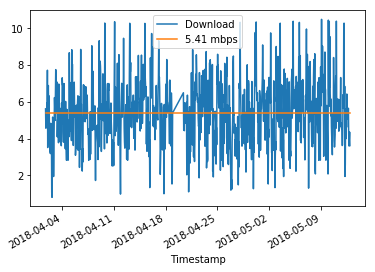

In [157]:
ax = bandwidth[['Timestamp','Download','Download_mean']].plot(x='Timestamp')
ax.legend(['Download','%.2f mbps' % bandwidth.Download_mean[0]])

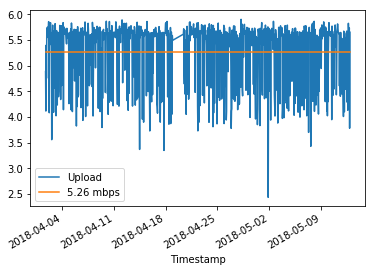

In [158]:
ax = bandwidth[['Timestamp','Upload','Upload_mean']].plot(x='Timestamp')
ax.legend(['Upload','%.2f mbps' % bandwidth.Upload_mean[0]])

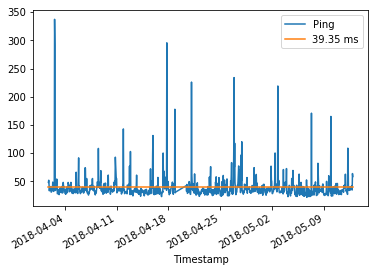

In [159]:
ax = bandwidth[['Timestamp','Ping','ping_mean']].plot(x='Timestamp')
ax.legend(['Ping','%.2f ms' % bandwidth.ping_mean[0]])

## Latency

### Import data

In [160]:
latency=pd.read_csv('latency.csv')
latency.head(5)

,timestamp,latency(ms)
0,2018-04-01T19:42:45,19.408
1,2018-04-01T20:42:47,21.975
2,2018-04-01T21:42:45,19.633
3,2018-04-01T22:42:48,19.760
4,2018-04-01T23:42:43,28.615


### Parse data

In [161]:
latency.timestamp = pd.to_datetime(latency.timestamp)
latency.head(5)

,timestamp,latency(ms)
0,2018-04-01 19:42:45,19.408
1,2018-04-01 20:42:47,21.975
2,2018-04-01 21:42:45,19.633
3,2018-04-01 22:42:48,19.760
4,2018-04-01 23:42:43,28.615


### Summary statistics and plots

In [162]:
mean = latency['latency(ms)'].mean()
latency['mean']=mean

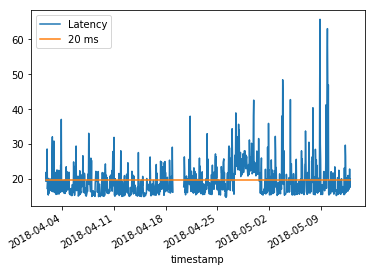

In [163]:
ax = latency[['timestamp','latency(ms)','mean']].plot(x='timestamp')
ax.legend(['Latency','%.0f ms' % mean])

In [164]:
downtime = latency[latency['latency(ms)'].isnull()]
print "%s hours downtime" % downtime.shape[0]
print "{:.1%} uptime".format(1-float(downtime.shape[0])/float(latency.shape[0]))

35 hours downtime
96.5% uptime


## Summary

Python is horrible for plotting.

See this Tableau Public Dashboard instead: https://public.tableau.com/profile/amadeus.stevenson#!/vizhome/BandwidthMonitor/Dashboard

![screen shot 2018-05-12 at 8 05 00 pm](https://user-images.githubusercontent.com/534681/39962552-da6cd448-561f-11e8-8826-47203438475b.png)